In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
import numpy as np

In [3]:
spy = pd.read_excel("C:\\Users\\Daniel\\Documents\\for_fun\\spy.xlsx")
eth = pd.read_excel("C:\\Users\\Daniel\\Documents\\for_fun\\eth.xlsx")

In [4]:
spy.set_index('Date', drop=True, inplace=True)
eth.set_index('Date', drop=True, inplace=True)

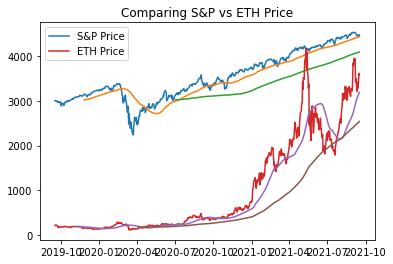

In [5]:
plt.plot(spy['S&P'], label='S&P Price')
plt.plot(spy['S&P 50d MA'])
plt.plot(spy['S&P 200d MA'])

plt.plot(eth['ETH'], label='ETH Price')
plt.plot(eth['ETH 50d MA'])
plt.plot(eth['ETH 200d MA'])

plt.legend(loc='best')
plt.title('Comparing S&P vs ETH Price')
plt.show()

This graph shows the overlay of S&P and ETH price, 50 day moving average, and 200 day moving average

In [6]:
spy['overall returns'] = spy['overall returns']*100

In [7]:
eth['overall returns'] = eth['overall returns']*100

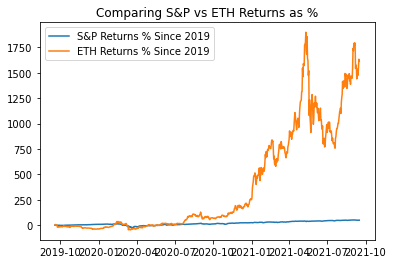

In [8]:
plt.plot(spy['overall returns'], label='S&P Returns % Since 2019')
plt.plot(eth['overall returns'], label='ETH Returns %')

plt.legend(loc='best')
plt.title('Comparing S&P vs ETH Returns as %')
plt.show()

This graph shows the overlay of S&P and ETH % return since 2019

In [9]:
spy

,S&P,S&P 50d MA,S&P 200d MA,overall returns,daily return,Move
Date,,,,,,
2019-09-17,3005.70,NaN,NaN,NaN,NaN,NaN
2019-09-18,3006.73,NaN,NaN,0.034268,0.000343,UP
2019-09-19,3006.79,NaN,NaN,0.036264,0.000020,UP
2019-09-20,2992.07,NaN,NaN,-0.453472,-0.004896,DOWN
2019-09-23,2991.78,NaN,NaN,-0.463120,-0.000097,DOWN
...,...,...,...,...,...,...
2021-09-10,4458.58,4420.7960,4077.59165,48.337492,-0.007723,DOWN
2021-09-13,4468.73,4424.0176,4081.99660,48.675184,0.002277,UP
2021-09-14,4443.05,4426.9934,4086.16320,47.820807,-0.005747,DOWN


In [10]:
eth

,ETH,ETH 50d MA,ETH 200d MA,overall returns,daily return,Move
Date,,,,,,
2019-09-17,208.61,NaN,NaN,NaN,NaN,NaN
2019-09-18,211.39,NaN,NaN,1.332630,0.013326,UP
2019-09-19,221.28,NaN,NaN,6.073534,0.046786,UP
2019-09-20,218.05,NaN,NaN,4.525191,-0.014597,DOWN
2019-09-21,215.52,NaN,NaN,3.312401,-0.011603,DOWN
...,...,...,...,...,...,...
2021-09-12,3410.13,3096.2102,2499.57365,1534.691530,0.042764,UP
2021-09-13,3285.51,3120.6284,2508.49140,1474.953262,-0.036544,DOWN
2021-09-14,3429.17,3142.5112,2517.54045,1543.818609,0.043725,UP


In [17]:
count = 0
up_up = 0
up_down = 0
down_up = 0
down_down = 0
for i in range(len(spy.index)):
    if spy['Move'][i] == 'UP':
        if eth['Move'][spy.index[i]] == 'UP':
            up_up += 1
        elif eth['Move'][spy.index[i]] == 'DOWN':
            up_down += 1
    
    elif spy['Move'][i] == 'DOWN':
        if eth['Move'][spy.index[i]] == 'UP':
            down_up += 1
        elif eth['Move'][spy.index[i]] == 'DOWN':
            down_down +=1
    
    count += 1
print('When S&P is up, ETH is up {}% of the time.'.format(100*up_up/(up_up+up_down)))
print('When S&P is up, ETH is down {}% of the time.'.format(100*up_down/(up_up+up_down)))
print('When S&P is down, ETH is up {}% of the time.'.format(100*down_up/(down_up+down_down)))
print('When S&P is down, ETH is down {}% of the time.'.format(100*down_down/(down_up+down_down)))

When S&P is up, ETH is up 57.241379310344826% of the time.
When S&P is up, ETH is down 42.758620689655174% of the time.
When S&P is down, ETH is up 50.467289719626166% of the time.
When S&P is down, ETH is down 49.532710280373834% of the time.


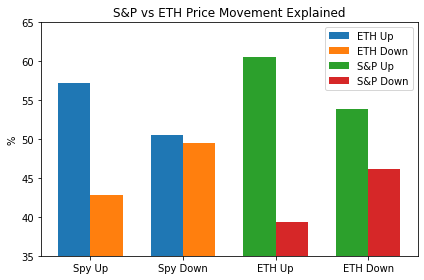

In [67]:
labels = ['Spy Up', 'Spy Down', 'ETH Up', 'ETH Down']
eth_up = [57.2, 50.5,0,0]
eth_down = [42.8, 49.5,0,0]
spy_up = [0,0,60.6, 53.9]
spy_down = [0,0,39.4, 46.1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, eth_up, width, label='ETH Up')
rects2 = ax.bar(x + width/2, eth_down, width, label='ETH Down')
rects3 = ax.bar(x - width/2, spy_up, width, label='S&P Up')
rects4 = ax.bar(x + width/2, spy_down, width, label='S&P Down')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('S&P vs ETH Price Movement Explained')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ymin, ymax = plt.ylim()

plt.ylim(35, 65)

fig.tight_layout()

plt.show()

This bar chart shows what S&P and ETH do relative to each other

In [19]:
count = 0
up_up = 0
up_down = 0
down_up = 0
down_down = 0
for i in range(len(spy.index)):
    if eth['Move'][spy.index[i]] == 'UP':
        if spy['Move'][i] == 'UP':
            up_up += 1
        elif spy['Move'][i] == 'DOWN':
            up_down += 1
    
    elif eth['Move'][spy.index[i]] == 'DOWN':
        if spy['Move'][i] == 'UP':
            down_up += 1
        elif spy['Move'][i] == 'DOWN':
            down_down +=1
    
    count += 1
print('When ETH is up, S&P is up {}% of the time.'.format(100*up_up/(up_up+up_down)))
print('When ETH is up, S&P is down {}% of the time.'.format(100*up_down/(up_up+up_down)))
print('When ETH is up, S&P is up {}% of the time.'.format(100*down_up/(down_up+down_down)))
print('When ETH is up, S&P is down {}% of the time.'.format(100*down_down/(down_up+down_down)))

When ETH is up, S&P is up 60.583941605839414% of the time.
When ETH is up, S&P is down 39.416058394160586% of the time.
When ETH is up, S&P is up 53.91304347826087% of the time.
When ETH is up, S&P is down 46.08695652173913% of the time.


In [75]:
def split_graph(spy, eth, turn):
    spy_data = spy['daily return'][turn+1:turn+57]
    eth_data = eth['daily return'][spy.index[turn+1:turn+57]]
    spy_abs = abs(spy_data)
    eth_abs = abs(eth_data)
    
    spy_scaled = spy_data/(max(spy_abs))
    eth_scaled = eth_data/(max(eth_abs))
    
    figure(figsize=(15,5))
    plt.plot(spy_scaled, label='S&P Scaled Change')
    plt.plot(eth_scaled, label='ETH Scaled Change')

    plt.legend(loc='best')
    plt.title('Comparing S&P vs ETH Daily Change {} to {}'.format(spy.index[0], spy.index[50]))
    plt.show()

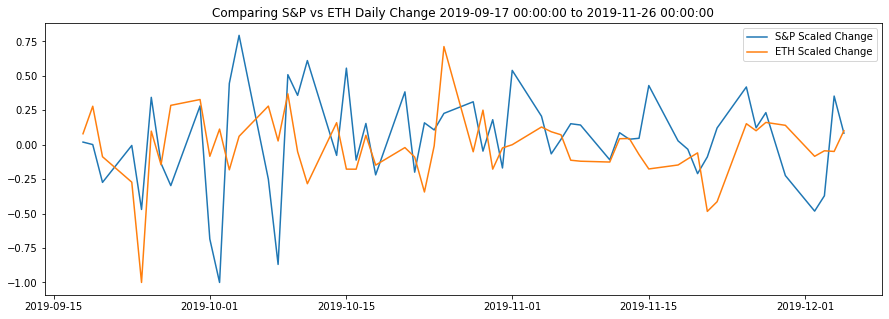

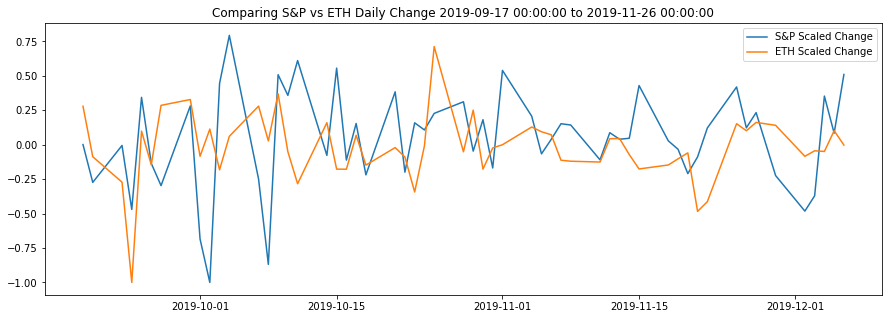

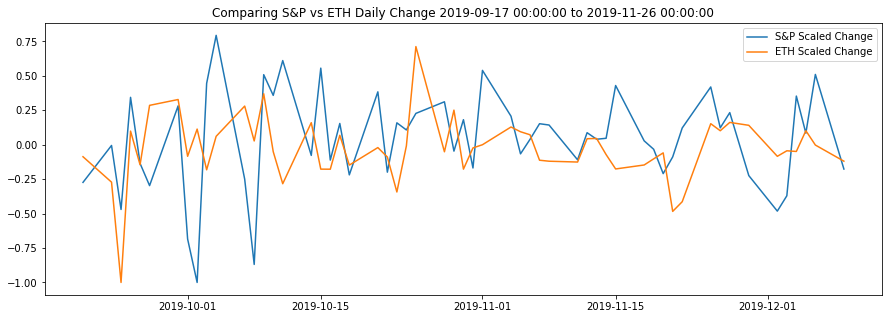

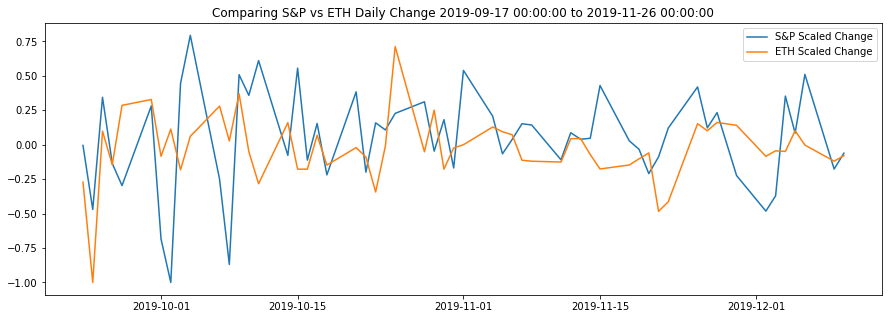

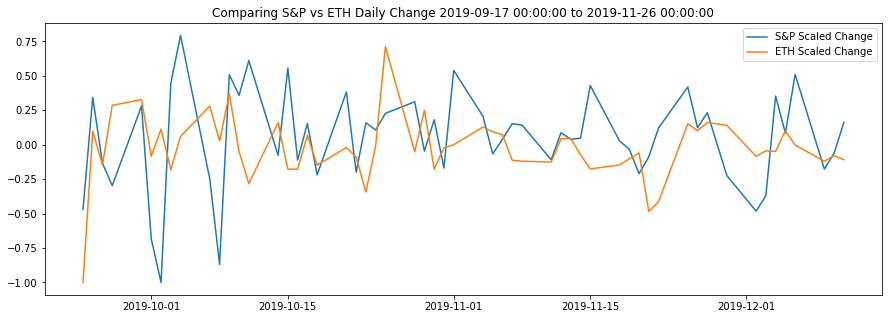

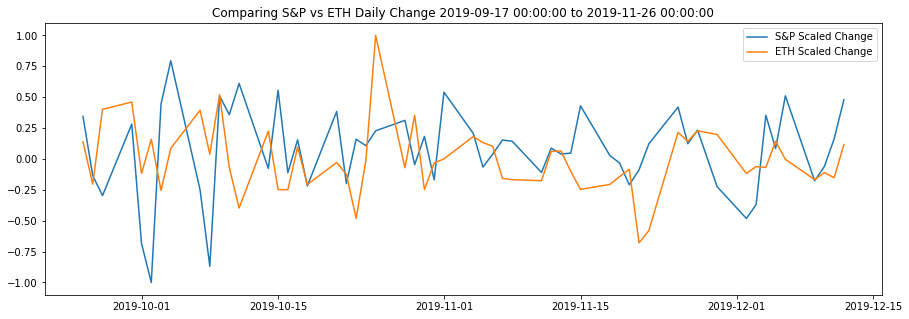

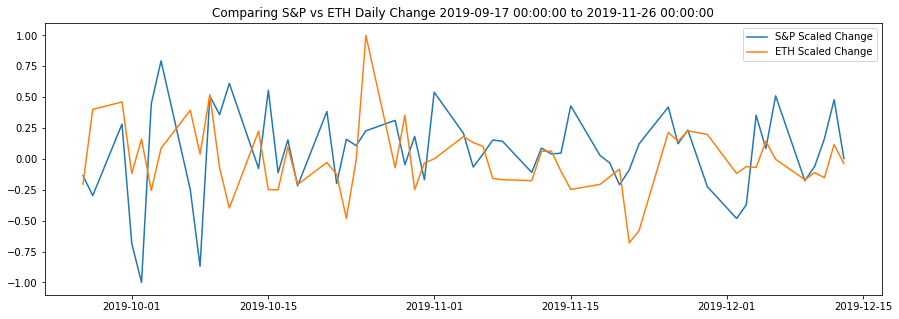

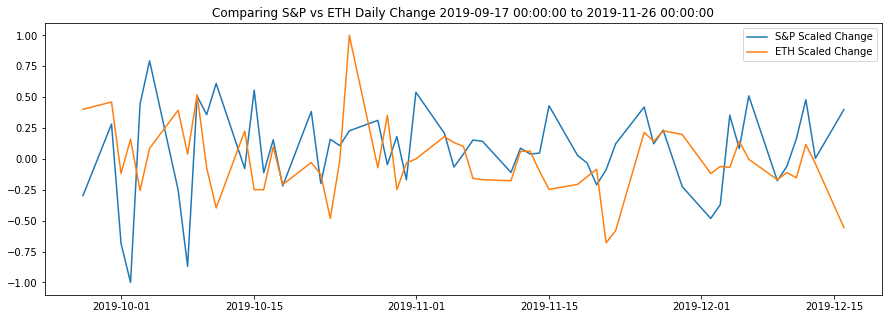

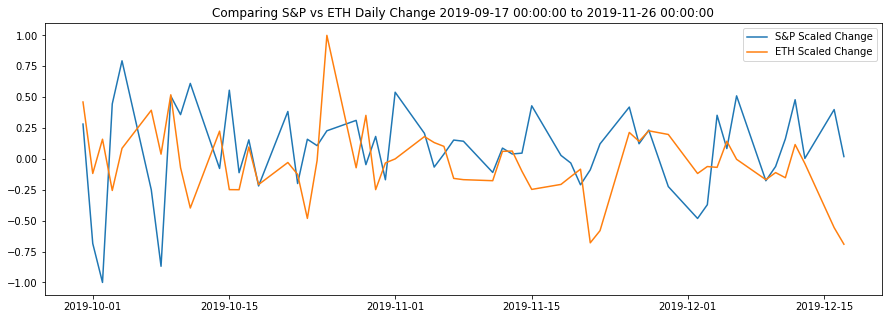

In [76]:
for i in range(9):
    split_graph(spy, eth, i)

These graphs show S&P and ETH relative price change in 75 day windows